# Autoría:

                     Manuel López Amo-Ocón
                     Alejangro Galván Pérez-Ilzarbe
                     Santiago Cebellán
                     Alejandro Meza Tudela

# COVID-19 

La enfermedad por coronavirus (COVID 19) es una enfermedad infecciosa causada por un coronavirus recientemente descubierto. La mayoría de las personas que enferman de COVID 19 experimentan síntomas de leves a moderados y se recuperan sin tratamiento especial.


# Cómo se propaga

El virus que causa la COVID‑19 se transmite principalmente a través de las gotículas generadas cuando una persona infectada tose, estornuda o espira. Estas gotículas son demasiado pesadas para permanecer suspendidas en el aire y caen rápidamente sobre el suelo o las superficies.

Usted puede infectarse al inhalar el virus si está cerca de una persona con COVID‑19 o si, tras tocar una superficie contaminada, se toca los ojos, la nariz o la boca.

Mas información:
https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov-China/home.ht

En el presente Notebook, se ha realizado una primera aproximación del comportamiento de esta enfermedad sobre una población dada. En un futuro, el código se podría adaptar para cualquier otra enfermedad. 

# Librerías

In [1]:
#Importar librerias? Pues claro que me importan!
!pip install plotly==4.7.0
!pip install seaborn==0.10.1
import numpy as np #agrega soporte para vectores y matrices, contituye biblioteca de funciones de alto nivel
from numpy import random #random permite la generacion de numeros aleatorios 
from random import choices #choices esta dedicado a la representacion de pesos 
import os 
import seaborn as sns
import matplotlib.pyplot as plt #Dedicado a la representacion grafica 
from scipy.stats import rv_discrete
import pandas as pd


# Variables globales

In [2]:
#Definicion de variables 
mediaincubacion = 7 #media de dias de la incubacion
desvincubacion = 3 #desviacion de la incubacion 
mediaduracion = 14 #media de duracion 
desvduracion = 5 #deviacion de la duracion 
posibilidadContagio = 0.9990 #posibilidad de que una sola persona no te contagie en una hora en el mismo edificio
cambioEstadoInicial = mediaincubacion/2 #tiempo en dias que se tarda en cambiar de estado
print(cambioEstadoInicial)
numpersonas = 2000 #numero de personas de la simulacion 
personasEdificio = 50 #numero de personas/edificio 
horassimulacion = 4800 #horas de la simulacion 
maxPiso=15 #maximo de personas que hay en un piso
aforoMedio=numpersonas/personasEdificio
#Primera columna=rangos de edades, Segunda columna= Mortalidades totales
mortalidadEdadesCovid=[[10,20,30,40,50,60,70,80,1000],[0.01,0.2,0.2,0.2,0.4,1.3,3.6,8,14.9]]
mortalidadEdadesCovid[1][:]=[x /0.6 for x in mortalidadEdadesCovid[1][:]]#dividimos entre 0.6 para tener en cuenta a los asintomaticos

3.5


# Definición de clases

De cara a la segunda versión del simulador, se ha optado por la creación de la clase persona, clase simulador y clase edificio.  

Atributos clase persona: idpersona, edad, estados posibles, cambioEstado, contadorInfecciones, dni, idVivienda, idOficina ,
lugarActual, horario, HeTrabajado, HeVisitado. 

Atributos de la clase simulador: dtrEdad, ciudad, dia, hora, numpersonasinicial, numpersonas, numViviendas, numOficinas, serviciosDisponibles, capacidades, CatalogoPersonas, cementerio, RegistroSanos, RegistroMuertos, mortalidadEdadesCovid.  

Atributos de la clase edificio: capacidadEdificio, numeroEdificio, departamentos, habitantesPorDepartamento, tipo. 

In [3]:
from SimuladorV19 import * #importacion de clase simulador 
from EdificioV19 import * #importacion de la clase edificio
from PersonaV19 import * #importacion de la clase persona 

# Funciones

In [4]:
#Funcion que permite mostrar en pantalla la ciudad
def printearciudad(ciudad):        
    for j in range(len(ciudad)):
        for i in range(len(ciudad[j])):
            print(ciudad[j][i])
        print()        
        
#Funcion que dada la ciudad, y un indice, permite imprimir el edificio que corresponda a ese indice
def printearEdificio(ciudad , i):
     for j in range(len(ciudad[i])):
        print(ciudad[i][j])
    

# Código encargado de la simulación

In [6]:
#creacion de un objeto de la clase simulador
MiSimulador=Simulador(numpersonas=numpersonas,personasEdificio=personasEdificio,maxPiso=maxPiso,mortalidadEdadesCovid=mortalidadEdadesCovid,aforoMedio=aforoMedio+1)

#se crea un paciente que resulta ser el 0, pasandole 15 dias como dia para el cambio de estado
MiSimulador.contagio_fijo(cambioEstadoInicial,10) 
#MiSimulador.graficoPersonasEdades()
#MiSimulador.printearCatalogo()
for i in range(horassimulacion): #horas que pasa la simulacion 
    '''
    Datos inventados:
    MediaIncubación:7 dias
    DesvIncubación:3 dias
    MediaDuracion:14 dias
    DescDuracion:5 dias
    '''
    MiSimulador.pasar_tiempo(mediaincubacion,desvincubacion,mediaduracion,desvduracion,posibilidadContagio)
    if MiSimulador.hora==0:  
        print("--------")
        print(" ")
        print(" ")
        print(f"Dia: {MiSimulador.dia} || Hora: {MiSimulador.hora}")
        #print(MiSimulador.serviciosDisponibles)
        #print(MiSimulador.ciudadOficinas[0].printearpersonas())
        #if MiSimulador.hora%20==0:
        #MiSimulador.printearCatalogo()
        #print(MiSimulador.CatalogoPersonas[0])
        #for i in MiSimulador.ciudadOficinas:
        #    print(i.numeroEdificio,str(len(i.vestibulo)),i.edificioAbierto[MiSimulador.hora])
        #print("--------")


        #print(MiSimulador.ciudadOficinas[0].edificioAbierto[MiSimulador.hora],len(MiSimulador.ciudadOficinas[0].vestibulo))
        print("lista servicios: "+str(len(MiSimulador.serviciosDisponibles)))
        print("-----------")
        print("")
        #MiSimulador.ciudadOficinas[0].printearpersonas()
        print("")
        print(" ")
        print(" ")
        print(" ")
        print(" ")
        print("--------")

        


2000 50 15 41.0
Num.Edificio: 0 , PersonasEdificio: 49, MaxCapacidad: 15, aforo: 36
Num.Edificio: 1 , PersonasEdificio: 50, MaxCapacidad: 15, aforo: 50
Num.Edificio: 2 , PersonasEdificio: 33, MaxCapacidad: 15, aforo: 34
Num.Edificio: 3 , PersonasEdificio: 65, MaxCapacidad: 15, aforo: 34
Num.Edificio: 4 , PersonasEdificio: 60, MaxCapacidad: 15, aforo: 41
Num.Edificio: 5 , PersonasEdificio: 45, MaxCapacidad: 15, aforo: 57
Num.Edificio: 6 , PersonasEdificio: 67, MaxCapacidad: 15, aforo: 51
Num.Edificio: 7 , PersonasEdificio: 57, MaxCapacidad: 15, aforo: 39
Num.Edificio: 8 , PersonasEdificio: 69, MaxCapacidad: 15, aforo: 33
Num.Edificio: 9 , PersonasEdificio: 71, MaxCapacidad: 15, aforo: 52
Num.Edificio: 10 , PersonasEdificio: 55, MaxCapacidad: 15, aforo: 47
Num.Edificio: 11 , PersonasEdificio: 66, MaxCapacidad: 15, aforo: 40
Num.Edificio: 12 , PersonasEdificio: 70, MaxCapacidad: 15, aforo: 20
Num.Edificio: 13 , PersonasEdificio: 47, MaxCapacidad: 15, aforo: 31
Num.Edificio: 14 , PersonasE

Contagio en la casa 7!
Contagio en el vestibulo de la oficina 5!
Contagio en la casa 2!
Contagio en la casa 6!
Contagio en la casa 34!
--------
 
 
Dia: 29 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
Contagio en la casa 2!
Contagio en el vestibulo de la oficina 25!
Contagio en la casa 4!
Contagio en el vestibulo de la oficina 14!
Contagio en la casa 15!
Contagio en la casa 34!
Contagio en la oficina 4!
Contagio en la oficina 34!
Contagio en la oficina 26!
Contagio en la oficina 34!
Contagio en la oficina 26!
Contagio en la oficina 30!
Contagio en la casa 29!
Contagio en el vestibulo de la oficina 1!
--------
 
 
Dia: 30 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
Contagio en la oficina 11!
Contagio en la casa 24!
Contagio en la casa 15!
Contagio en la casa 25!
Contagio en la oficina 27!
Contagio en el vestibulo de la oficina 35!
Contagio en el vestibulo de la oficina 35!
Contagio en la casa 27!
--------
 
 
Dia: 31 || Hora: 0
lista servicios: 19
----

Contagio en la casa 28!
Contagio en la casa 30!
Contagio en la oficina 9!
Contagio en la oficina 34!
Contagio en la casa 22!
Contagio en la casa 22!
Contagio en la oficina 9!
Contagio en la casa 19!
Contagio en la casa 32!
Contagio en la oficina 15!
Contagio en la casa 22!
Contagio en la casa 1!
Contagio en la casa 6!
Contagio en la casa 25!
--------
 
 
Dia: 47 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
Contagio en el vestibulo de la oficina 13!
Contagio en la casa 1!
Contagio en el vestibulo de la oficina 28!
Contagio en la casa 13!
Contagio en la casa 2!
Contagio en la casa 18!
Contagio en la casa 3!
Contagio en la oficina 7!
Contagio en la oficina 32!
Contagio en la oficina 30!
Contagio en la casa 1!
Contagio en el vestibulo de la oficina 35!
Contagio en la casa 3!
Contagio en el vestibulo de la oficina 4!
Contagio en la oficina 9!
Contagio en el vestibulo de la oficina 30!
Contagio en la casa 9!
Contagio en el vestibulo de la oficina 2!
--------
 
 
Dia: 48 || H

Contagio en el vestibulo de la oficina 15!
Contagio en el vestibulo de la oficina 12!
Contagio en la oficina 15!
Contagio en la casa 8!
Contagio en la casa 17!
Contagio en la casa 18!
Contagio en la casa 38!
--------
 
 
Dia: 57 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
Contagio en la casa 3!
Contagio en la casa 22!
Contagio en la casa 30!
Contagio en el vestibulo de la oficina 14!
Contagio en la oficina 28!
Contagio en la casa 0!
Contagio en la casa 3!
Contagio en la casa 18!
Contagio en la casa 14!
Contagio en la casa 18!
Contagio en la casa 28!
Contagio en la casa 27!
Contagio en la oficina 5!
Contagio en la casa 22!
Contagio en la oficina 3!
Contagio en la oficina 21!
Contagio en la oficina 5!
Contagio en la oficina 23!
Contagio en la casa 25!
Contagio en el vestibulo de la oficina 0!
Contagio en la casa 2!
Contagio en la casa 26!
Contagio en la casa 15!
Contagio en la casa 37!
Contagio en el vestibulo de la oficina 8!
Contagio en el vestibulo de la oficina 5!
C

Contagio en la casa 26!
Contagio en el vestibulo de la oficina 25!
Contagio en el vestibulo de la oficina 30!
Contagio en la casa 25!
Contagio en la casa 25!
Contagio en el vestibulo de la oficina 8!
Contagio en la oficina 19!
Contagio en la casa 17!
--------
 
 
Dia: 66 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
Contagio en el vestibulo de la oficina 8!
Contagio en la casa 39!
Contagio en la oficina 10!
Contagio en la casa 27!
Contagio en la casa 22!
Contagio en la casa 29!
Contagio en la casa 19!
Contagio en la casa 36!
Contagio en la oficina 17!
Contagio en la casa 15!
Contagio en la oficina 7!
Contagio en el vestibulo de la oficina 21!
Contagio en la casa 1!
Contagio en la casa 16!
Contagio en la oficina 30!
Contagio en la casa 29!
Contagio en la casa 13!
Contagio en el vestibulo de la oficina 12!
Contagio en el vestibulo de la oficina 25!
Contagio en la casa 39!
Contagio en el vestibulo de la oficina 37!
Contagio en la casa 22!
Contagio en el vestibulo de la ofi

Contagio en el vestibulo de la oficina 23!
Contagio en la casa 30!
Contagio en la casa 30!
Contagio en el vestibulo de la oficina 37!
Contagio en la casa 13!
Contagio en la casa 24!
Contagio en la casa 24!
Contagio en la casa 24!
Contagio en la casa 25!
Contagio en la casa 30!
Contagio en la casa 35!
Contagio en la oficina 20!
Contagio en la casa 18!
Contagio en la casa 2!
--------
 
 
Dia: 76 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
Contagio en la casa 35!
Contagio en la oficina 1!
Contagio en la casa 24!
Contagio en la casa 24!
Contagio en la casa 27!
Contagio en la casa 14!
Contagio en la casa 30!
Contagio en la oficina 23!
Contagio en la casa 19!
Contagio en la casa 23!
Contagio en la oficina 4!
Contagio en el vestibulo de la oficina 20!
Contagio en el vestibulo de la oficina 25!
Contagio en la casa 15!
Contagio en la casa 27!
Contagio en la oficina 9!
Contagio en la oficina 12!
Contagio en el vestibulo de la oficina 25!
Contagio en la casa 9!
Contagio en la ca

Contagio en la casa 33!
Contagio en la casa 11!
Contagio en el vestibulo de la oficina 38!
Contagio en la casa 6!
--------
 
 
Dia: 91 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
Contagio en la casa 0!
Contagio en la casa 38!
Contagio en la casa 9!
Contagio en la casa 15!
Contagio en la casa 30!
Contagio en la casa 14!
Contagio en la casa 18!
Contagio en la casa 33!
Contagio en la casa 7!
Contagio en la casa 33!
Contagio en el vestibulo de la oficina 12!
Contagio en la casa 26!
Contagio en la casa 7!
Contagio en la oficina 20!
Contagio en la casa 6!
--------
 
 
Dia: 92 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
Contagio en el vestibulo de la oficina 14!
Contagio en la casa 19!
Contagio en la casa 6!
Contagio en la casa 17!
Contagio en la casa 31!
Contagio en la casa 37!
Contagio en el vestibulo de la oficina 4!
Contagio en la casa 4!
Contagio en el vestibulo de la oficina 25!
Contagio en la casa 15!
Contagio en la casa 38!
Contagio en el vestibulo 

Contagio en el vestibulo de la oficina 27!
--------
 
 
Dia: 139 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
--------
 
 
Dia: 140 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
--------
 
 
Dia: 141 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
--------
 
 
Dia: 142 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
--------
 
 
Dia: 143 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
Contagio en la casa 11!
--------
 
 
Dia: 144 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
--------
 
 
Dia: 145 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
--------
 
 
Dia: 146 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
--------
 
 
Dia: 147 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
--------
 
 
Dia: 148 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
--------
 
 
Dia: 149 || Hora: 0
lista servicios: 19
-----------


 
 
 
 
--------
--------



El cementerio es: 
ID: 1227, Estado: muerto, DNI: 50807812F, edad:91, Vivienda y piso:24,1, Oficina y piso:34,3Lugar actual: 0 0 3 
ID: 244, Estado: muerto, DNI: 74272588E, edad:70, Vivienda y piso:4,6, Oficina y piso:26,3Lugar actual: 0 0 3 
ID: 394, Estado: muerto, DNI: 14540208E, edad:59, Vivienda y piso:7,0, Oficina y piso:2,0Lugar actual: 0 0 3 
ID: 1955, Estado: muerto, DNI: 34117157S, edad:76, Vivienda y piso:39,1, Oficina y piso:15,0Lugar actual: 0 0 3 
ID: 449, Estado: muerto, DNI: 67350781L, edad:72, Vivienda y piso:7,6, Oficina y piso:2,0Lugar actual: 0 0 3 
ID: 786, Estado: muerto, DNI: 37857287T, edad:82, Vivienda y piso:15,0, Oficina y piso:9,8Lugar actual: 0 0 3 
ID: 968, Estado: muerto, DNI: 81376088H, edad:61, Vivienda y piso:18,5, Oficina y piso:17,4Lugar actual: 0 0 3 
ID: 1949, Estado: muerto, DNI: 11842075L, edad:55, Vivienda y piso:39,1, Oficina y piso:20,4Lugar actual: 0 0 3 
ID: 762, Estado: muerto, DNI: 88426680Y, edad:100, Vivienda y piso:14,5, Oficina y piso

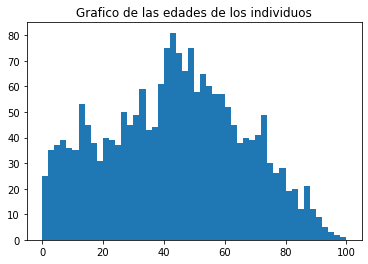

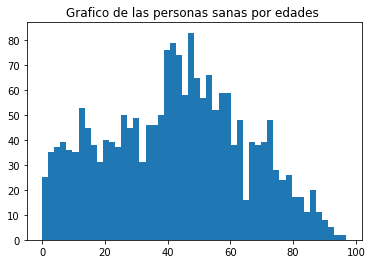

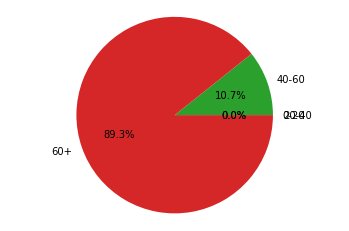

In [7]:
MiSimulador.mostrarcementerio()
MiSimulador.graficoPersonasEdades()
MiSimulador.graficoPersonasSanas()
MiSimulador.defuncionesPorEdades()

In [8]:

MiSimulador.printearCatalogo()

ID: 0, Estado: inmune, DNI: 44880422Q, edad:39, Vivienda y piso:0,0, Oficina y piso:32,3Lugar actual: 11 -1 2 
ID: 1, Estado: inmune, DNI: 58800070H, edad:5, Vivienda y piso:0,0, Oficina y piso:19,4Lugar actual: 19 4 1 
ID: 2, Estado: inmune, DNI: 72447583K, edad:65, Vivienda y piso:0,0, Oficina y piso:14,0Lugar actual: 14 0 1 
ID: 3, Estado: inmune, DNI: 17136482X, edad:20, Vivienda y piso:0,0, Oficina y piso:15,6Lugar actual: 15 6 1 
ID: 4, Estado: inmune, DNI: 80345215M, edad:59, Vivienda y piso:0,0, Oficina y piso:11,8Lugar actual: 11 8 1 
ID: 5, Estado: sano, DNI: 76446012S, edad:7, Vivienda y piso:0,0, Oficina y piso:14,3Lugar actual: 22 -1 2 
ID: 6, Estado: sano, DNI: 32460288C, edad:5, Vivienda y piso:0,0, Oficina y piso:16,2Lugar actual: 20 -1 2 
ID: 7, Estado: inmune, DNI: 50600885B, edad:45, Vivienda y piso:0,0, Oficina y piso:8,5Lugar actual: 38 -1 2 
ID: 8, Estado: inmune, DNI: 50545341N, edad:57, Vivienda y piso:0,0, Oficina y piso:11,5Lugar actual: 11 5 1 
ID: 9, Estado:

In [9]:
for i in MiSimulador.ciudadOficinas:
    print("-----------")
    print("")
    i.printearpersonas()
    print("")
    print("-----------")

-----------

ID :0
Piso 0 :
Piso 1 :
Piso 2 :
Piso 3 :
Piso 4 :
Piso 5 :
Piso 6 :
Piso 7 :
Piso 8 :
Piso 9 :

Vestíbulo :0 / aforo:  36

-----------
-----------

ID :1
Piso 0 :
ID: 609, Estado: inmune, DNI: 24565606L, edad:52, Vivienda y piso:11,4, Oficina y piso:1,0Lugar actual: 1 0 1 
ID: 673, Estado: inmune, DNI: 46526744K, edad:61, Vivienda y piso:13,4, Oficina y piso:1,0Lugar actual: 1 0 1 
ID: 711, Estado: inmune, DNI: 23021853A, edad:33, Vivienda y piso:13,9, Oficina y piso:1,0Lugar actual: 1 0 1 
ID: 1525, Estado: inmune, DNI: 42632110T, edad:1, Vivienda y piso:30,1, Oficina y piso:1,0Lugar actual: 1 0 1 
Piso 1 :
ID: 124, Estado: inmune, DNI: 26126620T, edad:56, Vivienda y piso:2,1, Oficina y piso:1,1Lugar actual: 1 1 1 
ID: 270, Estado: sano, DNI: 12585470P, edad:66, Vivienda y piso:4,11, Oficina y piso:1,1Lugar actual: 1 1 1 
ID: 527, Estado: inmune, DNI: 65500312S, edad:5, Vivienda y piso:9,1, Oficina y piso:1,1Lugar actual: 1 1 1 
ID: 848, Estado: inmune, DNI: 66712803S, e